In [1]:
import pandas as pd
import numpy as np
import cv2

https://www.superdatascience.com/opencv-face-detection/

In [2]:
import matplotlib.pyplot as plt

/home/esposito/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
%matplotlib inline

In [5]:
import time

In [6]:
def convert_to_RBG(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [18]:
import os
os.getcwd()

'/home/esposito/Documents'

In [19]:
img_path = os.getcwd() + '/data'

In [20]:
img_path

'/home/esposito/Documents/data'

In [27]:
#load test iamge
img = cv2.imread('data/nasa.jpg')
#convert the test image to gray image as opencv face detector expects gray images 
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

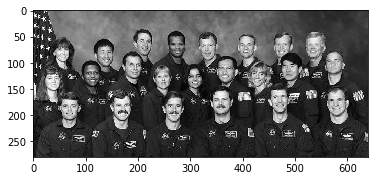

In [30]:
#if you have matplotlib installed then  
plt.imshow(gray_img, cmap='gray')  

# or display the gray image using OpenCV 
# cv2.imshow('Test Imag', gray_img) 
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

In [35]:
new_path = '/home/esposito/anaconda3/lib/python3.6/site-packages/cv2/'

#load cascade classifier training file for haarcascade 
haar_face_cascade = cv2.CascadeClassifier(new_path + 'data/haarcascade_frontalface_alt.xml')

#### OpenCV's CascadedClassifier has made it simple for us as it comes with the function detectMultiScale, which detects exactly that. Next are some details of its options/arguments:

    1. detectMultiScale(image, scaleFactor, minNeighbors): This is a general function to detect objects, in this case, it'll detect faces since we called in the face cascade. If it finds a face, it returns a list of positions of said face in the form “Rect(x,y,w,h).”, if not, then returns “None”.
    
    2. Image: The first input is the grayscale image. So make sure the image is in grayscale.
    
    3. scaleFactor: This function compensates a false perception in size that occurs when one face appears to be bigger than the other simply because it is closer to the camera.
    
    4. minNeighbors: This is a detection algorithm that uses a moving window to detect objects, it does so by defining how many objects are found near the current one before it can declare the face found.



In [36]:

#let's detect multiscale (some images may be closer to camera than others) images 
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5);  

#print the number of faces found 
print('Faces found: ', len(faces))


Faces found:  23


Next, let's loop over the list of faces (rectangles) it returned and drew those rectangles using yet another built-in OpenCV rectangle function on our original colored image to see if it found the right faces:

In [39]:
#go over list of faces and draw them as rectangles on original colored 
for (x, y, w, h) in faces:     
         cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

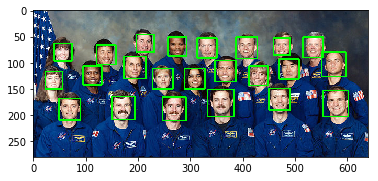

In [41]:
#convert image to RGB and show image 
plt.imshow(convert_to_RBG(img))

Grouping entire code into a function

In [51]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
 #just making a copy of image passed, so that passed image is not changed 
 img_copy = colored_img.copy()          

 #convert the test image to gray image as opencv face detector expects gray images
 gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          

 #let's detect multiscale (some images may be closer to camera than others) images
 faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);          
 print('Faces found: ', len(faces))
 #go over list of faces and draw them as rectangles on original colored img
 for (x, y, w, h) in faces:
      cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)              

 return img_copy

Faces found:  1


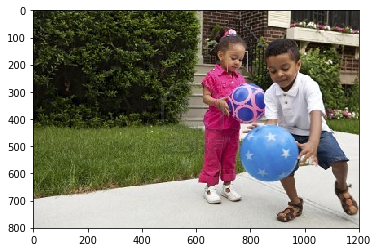

In [53]:
#load another image 
test2 = cv2.imread('data/kids.jpg')  

#call our function to detect faces 
faces_detected_img = detect_faces(haar_face_cascade, test2)  

#convert image to RGB and show image 
plt.imshow(convert_to_RBG(faces_detected_img))

DEALING WITH FALSE POSITIVES AND FALSE NEGATIVE

A simple tweak to the scale factor compensates for this so can move that parameter around. For example, scaleFactor=1.2 improved the results.

Faces found:  1


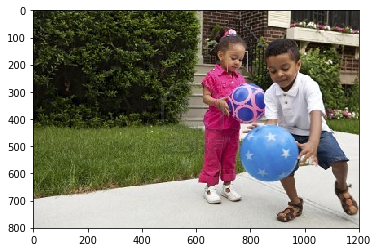

In [60]:
#load another image 
test2 = cv2.imread('data/kids.jpg')  

#call our function to detect faces 
faces_detected_img = detect_faces(haar_face_cascade, test2, scaleFactor = 1.1)  

#convert image to RGB and show image 
plt.imshow(convert_to_RBG(faces_detected_img))

By increasing scaleFactor we are not able to detect a single face in this image.

Faces found:  1


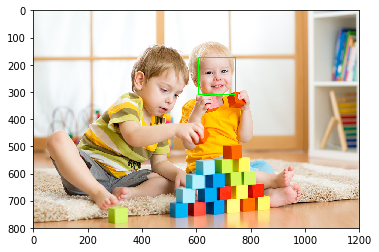

In [63]:
#load another image 
test3 = cv2.imread('data/kid.jpg')  

#call our function to detect faces 
faces_detected_img = detect_faces(haar_face_cascade, test3, scaleFactor = 1.1)  

#convert image to RGB and show image 
plt.imshow(convert_to_RBG(faces_detected_img))

Faces found:  5


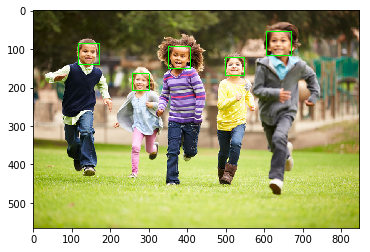

In [64]:
#load another image 
test4 = cv2.imread('data/runs.jpg')  

#call our function to detect faces 
faces_detected_img = detect_faces(haar_face_cascade, test4, scaleFactor = 1.1)  

#convert image to RGB and show image 
plt.imshow(convert_to_RBG(faces_detected_img))